In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from IPython.display import display

In [4]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt',header=None)

X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt',header=None)

features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, names=['id', 'feature_name'])
activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])

X_train.columns = features['feature_name']
X_test.columns = features['feature_name']

print("Dimensiones de los datos:")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

C:\Users\bruno\AppData\Local\Temp\ipykernel_19640\2684210714.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\bruno\AppData\Local\Temp\ipykernel_19640\2684210714.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
C:\Users\bruno\AppData\Local\Temp\ipykernel_19640\2684210714.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


Dimensiones de los datos:
(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


C:\Users\bruno\AppData\Local\Temp\ipykernel_19640\2684210714.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, names=['id', 'feature_name'])
C:\Users\bruno\AppData\Local\Temp\ipykernel_19640\2684210714.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])


feature_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
y_train_counts = y_train.value_counts().sort_index()
y_test_counts = y_test.value_counts().sort_index()

class_distribution = pd.DataFrame({
    "Train": y_train_counts.values,
    "Test": y_test_counts.values
}, index=activities["activity_name"])

class_distribution

,Train,Test
activity_name,,
WALKING,1226,496
WALKING_UPSTAIRS,1073,471
WALKING_DOWNSTAIRS,986,420
SITTING,1286,491
STANDING,1374,532
LAYING,1407,537


In [6]:
print("Valores nulos en X_train:", X_train.isnull().sum().sum())
print("Valores nulos en X_test:", X_test.isnull().sum().sum())

print("Rango de valores en X_train:")
X_train.describe().T[['min', 'max']]

Valores nulos en X_train: 0
Valores nulos en X_test: 0
Rango de valores en X_train:


,min,max
feature_name,,
tBodyAcc-mean()-X,-1.000000,1.000000
tBodyAcc-mean()-Y,-1.000000,1.000000
tBodyAcc-mean()-Z,-1.000000,1.000000
tBodyAcc-std()-X,-1.000000,1.000000
tBodyAcc-std()-Y,-0.999873,0.916238
...,...,...
"angle(tBodyGyroMean,gravityMean)",-1.000000,0.998702
"angle(tBodyGyroJerkMean,gravityMean)",-1.000000,0.996078
"angle(X,gravityMean)",-1.000000,1.000000


In [7]:
acc_features = X_train.filter(regex="Acc")
gyro_features = X_train.filter(regex="Gyro")

low_variance_features = X_train.var()[X_train.var() < 0.01]

print("Acelerómetro - Media Global:", acc_features.mean().mean())
print("Giroscopio - Media Global:", gyro_features.mean().mean())
print("Cantidad de características con baja varianza:", len(low_variance_features))

low_variance_features

Acelerómetro - Media Global: -0.5087652484356199
Giroscopio - Media Global: -0.5125882938368747
Cantidad de características con baja varianza: 37


feature_name
tBodyAcc-mean()-X                   0.004937
tBodyAcc-mean()-Y                   0.001665
tBodyAcc-mean()-Z                   0.003208
tGravityAcc-std()-X                 0.006084
tGravityAcc-std()-Y                 0.008366
tGravityAcc-mad()-X                 0.005887
tGravityAcc-mad()-Y                 0.008180
tGravityAcc-iqr()-X                 0.005378
tGravityAcc-iqr()-Y                 0.007570
fBodyAcc-bandsEnergy()-25,32        0.007780
fBodyAcc-bandsEnergy()-33,40        0.007159
fBodyAcc-bandsEnergy()-33,48        0.009689
fBodyAcc-bandsEnergy()-25,48        0.007824
fBodyAccJerk-bandsEnergy()-57,64    0.003367
fBodyAccJerk-bandsEnergy()-57,64    0.008928
fBodyAccJerk-bandsEnergy()-25,32    0.007487
fBodyAccJerk-bandsEnergy()-33,40    0.006514
fBodyAccJerk-bandsEnergy()-33,48    0.009088
fBodyAccJerk-bandsEnergy()-25,48    0.007637
fBodyGyro-bandsEnergy()-25,32       0.007621
fBodyGyro-bandsEnergy()-41,48       0.009440
fBodyGyro-bandsEnergy()-49,56       0.0072

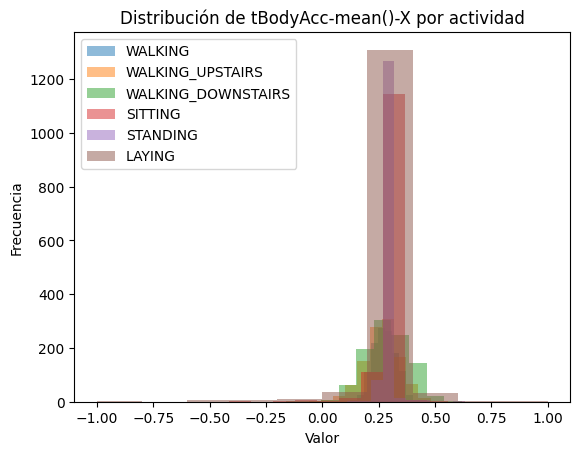

In [8]:
sample_feature = X_train.columns[0]

plt.figure()
for i, act in enumerate(activities["id"], 1):
    plt.hist(X_train[y_train[0] == act][sample_feature], alpha=0.5, label=activities["activity_name"][i-1])

plt.legend()
plt.title(f"Distribución de {sample_feature} por actividad")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\bruno\AppData\Local\Temp\ipykernel_19640\3032735845.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=activities["activity_name"], showfliers=False)


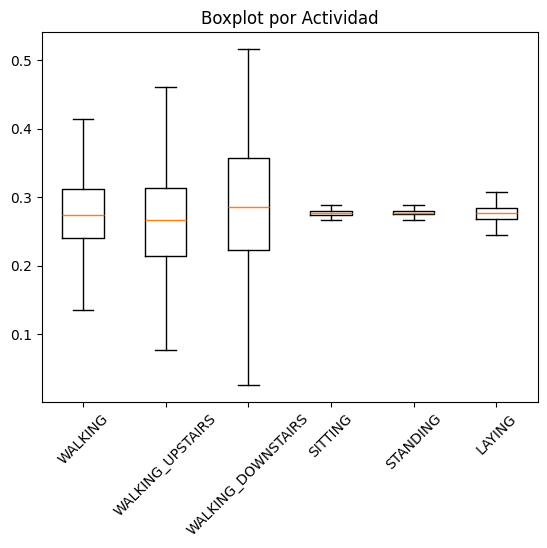

In [9]:
plt.figure()
data = [X_train[y_train[0] == act][sample_feature] for act in activities["id"]]
plt.boxplot(data, labels=activities["activity_name"], showfliers=False)
plt.xticks(rotation=45)
plt.title("Boxplot por Actividad")
plt.show()


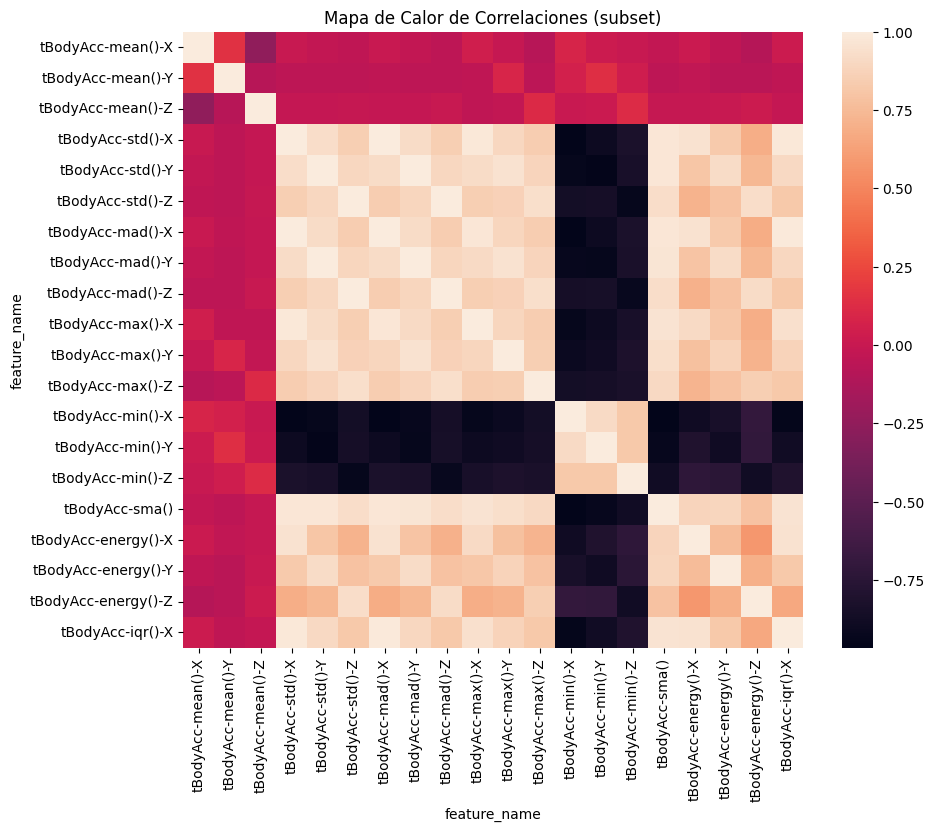

In [10]:
subset = X_train.iloc[:, :20]
corr_matrix = subset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.title("Mapa de Calor de Correlaciones (subset)")
plt.show()


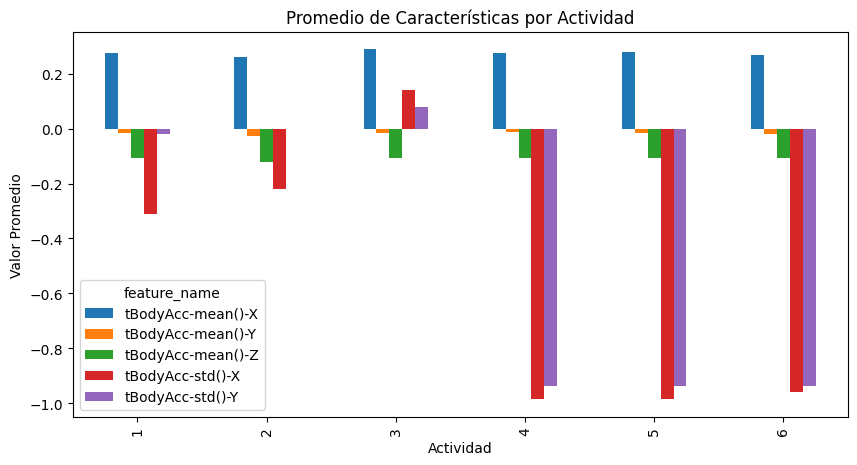

In [11]:
mean_values = X_train.groupby(y_train[0]).mean().iloc[:, :5]

mean_values.plot(kind="bar", figsize=(10,5))
plt.title("Promedio de Características por Actividad")
plt.xlabel("Actividad")
plt.ylabel("Valor Promedio")
plt.show()


In [12]:
print("Verificacion de normalizacion:")
print(X_train.mean().mean(), X_train.std().mean())
print("")
outliers = ((np.abs(X_train) > 5).sum().sum())
print("Cantidad de valores fuera de rango esperado:", outliers)


Verificacion de normalizacion:
-0.508365037734111 0.2836933644890431

Cantidad de valores fuera de rango esperado: 0


In [13]:
y_train_labels = y_train[0]
y_test_labels = y_test[0]

print("Estructura Final:")
print("X_train:", X_train.shape)
print("y_train:", y_train_labels.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test_labels.shape)


Estructura Final:
X_train: (7352, 561)
y_train: (7352,)
X_test: (2947, 561)
y_test: (2947,)


In [14]:

 
y_train_labels = y_train[0].values.ravel()
y_test_labels = y_test[0].values.ravel()
 
print("Clases únicas:", np.unique(y_train_labels))
print("Dimensiones:")
print("X_train:", X_train.shape, "y_train:", y_train_labels.shape)
print("X_test:", X_test.shape, "y_test:", y_test_labels.shape)

Clases únicas: [1 2 3 4 5 6]
Dimensiones:
X_train: (7352, 561) y_train: (7352,)
X_test: (2947, 561) y_test: (2947,)


Mejor k-NN: {'n_neighbors': 1, 'weights': 'uniform'} F1_macro CV: 0.9733292338461753
Tiempo de búsqueda CV (s): 10.522
k-NN Test - accuracy: 0.8785
k-NN Test - f1_macro: 0.8754
k-NN Test - precision_macro: 0.8796
k-NN Test - recall_macro: 0.8744
k-NN Test - accuracy: 0.8785
k-NN Test - f1_macro: 0.8754
k-NN Test - precision_macro: 0.8796
k-NN Test - recall_macro: 0.8744


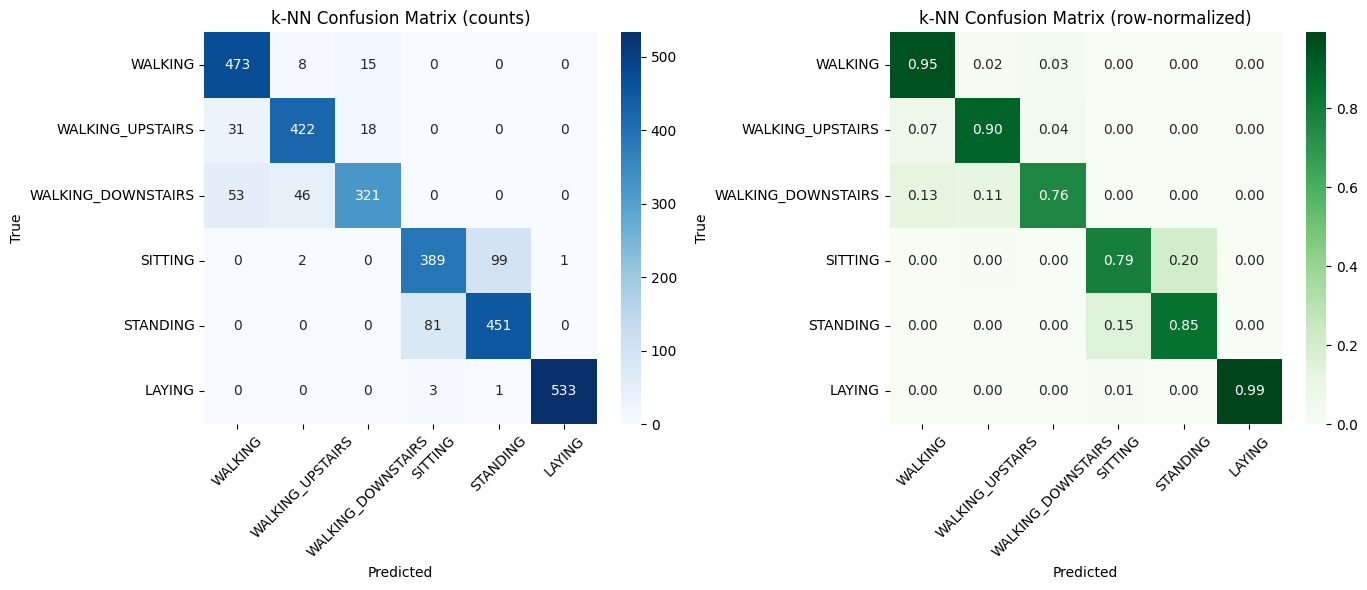

In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"n_neighbors": [1, 3, 5, 7], "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, scoring="f1_macro", cv=cv, n_jobs=-1)
t0 = time.time()
grid.fit(X_train, y_train_labels)
t_knn_cv = time.time() - t0
best_knn = grid.best_estimator_
print("Mejor k-NN:", grid.best_params_, "F1_macro CV:", grid.best_score_)
print("Tiempo de búsqueda CV (s):", round(t_knn_cv, 3))
 
t0 = time.time()
y_pred_knn = best_knn.predict(X_test)
t_knn_train = time.time() - t0
acc_knn = accuracy_score(y_test_labels, y_pred_knn)
f1_knn = f1_score(y_test_labels, y_pred_knn, average='macro')
prec_knn = precision_score(y_test_labels, y_pred_knn, average='macro')
rec_knn = recall_score(y_test_labels, y_pred_knn, average='macro')
cm_knn = confusion_matrix(y_test_labels, y_pred_knn)
 
print("k-NN Test - accuracy:", round(acc_knn, 4))
print("k-NN Test - f1_macro:", round(f1_knn, 4))
print("k-NN Test - precision_macro:", round(prec_knn, 4))
print("k-NN Test - recall_macro:", round(rec_knn, 4))
 
labels = activities['activity_name']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('k-NN Confusion Matrix (counts)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)
 
cm_knn_norm = cm_knn.astype('float') / cm_knn.sum(axis=1, keepdims=True)
sns.heatmap(cm_knn_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('k-NN Confusion Matrix (row-normalized)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

c:\Users\bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogReg Test - accuracy: 0.9603
LogReg Test - f1_macro: 0.9602
LogReg Test - precision_macro: 0.9626
LogReg Test - recall_macro: 0.9593
Tiempo entrenamiento LogReg (s): 5.021


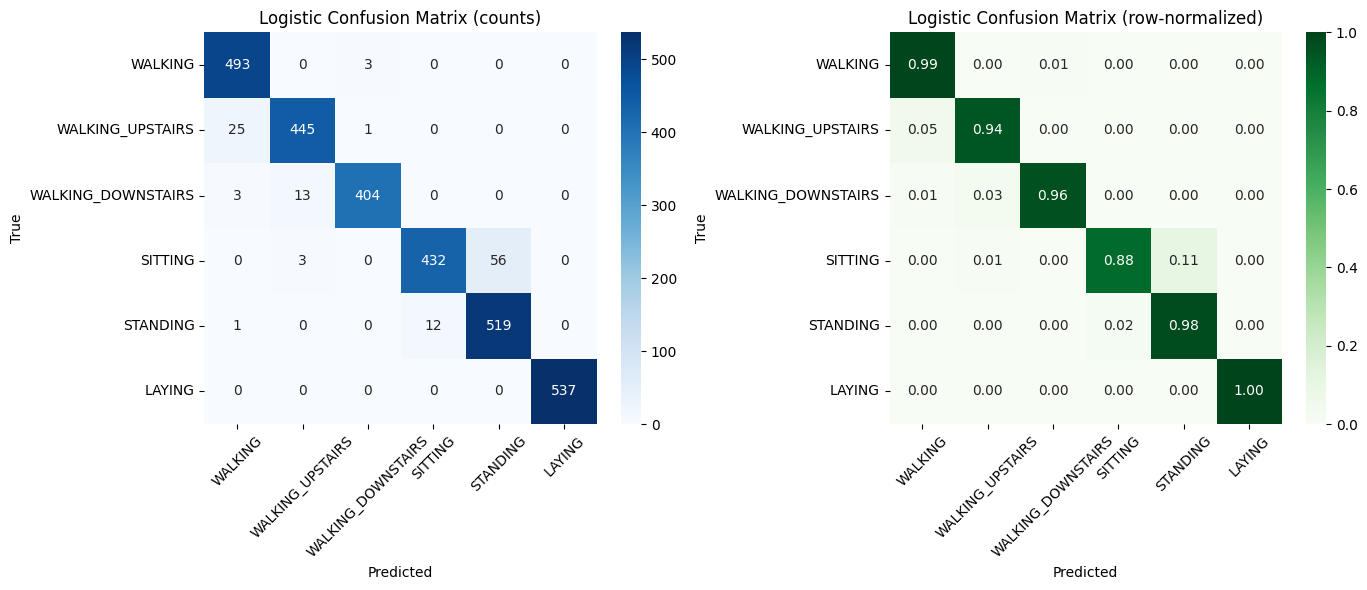

In [16]:
log_clf = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=2000, n_jobs=-1)
t0 = time.time()
log_clf.fit(X_train, y_train_labels)
t_log_train = time.time() - t0
y_pred_log = log_clf.predict(X_test)
acc_log = accuracy_score(y_test_labels, y_pred_log)
f1_log = f1_score(y_test_labels, y_pred_log, average='macro')
prec_log = precision_score(y_test_labels, y_pred_log, average='macro')
rec_log = recall_score(y_test_labels, y_pred_log, average='macro')
cm_log = confusion_matrix(y_test_labels, y_pred_log)
 
print("LogReg Test - accuracy:", round(acc_log, 4))
print("LogReg Test - f1_macro:", round(f1_log, 4))
print("LogReg Test - precision_macro:", round(prec_log, 4))
print("LogReg Test - recall_macro:", round(rec_log, 4))
print("Tiempo entrenamiento LogReg (s):", round(t_log_train, 3))
 
labels = activities['activity_name']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Logistic Confusion Matrix (counts)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)
 
cm_log_norm = cm_log.astype('float') / cm_log.sum(axis=1, keepdims=True)
sns.heatmap(cm_log_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Logistic Confusion Matrix (row-normalized)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

In [17]:
summary = pd.DataFrame({
    'Modelo': ['k-NN (best)', 'LogReg'],
    'Accuracy': [acc_knn, acc_log],
    'F1_macro': [f1_knn, f1_log],
    'Precision_macro': [prec_knn, prec_log],
    'Recall_macro': [rec_knn, rec_log],
    'Tiempo_entrenamiento_s': [t_knn_train, t_log_train]
})
summary

,Modelo,Accuracy,F1_macro,Precision_macro,Recall_macro,Tiempo_entrenamiento_s
0,k-NN (best),0.878521,0.87541,0.879644,0.874406,1.682488
1,LogReg,0.960299,0.96018,0.962586,0.959343,5.021336


In [ ]:
# Modelos probabilísticos y basados en árboles
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
id_to_name = dict(zip(activities['id'], activities['activity_name']))
labels_order = np.sort(np.unique(y_train_labels))
names_order = [id_to_name[int(lbl)] for lbl in labels_order]
 
def per_class_df(y_true, y_pred):
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred, average=None, labels=labels_order, zero_division=0)
    return pd.DataFrame({'precision': p, 'recall': r, 'f1': f1, 'support': s}, index=names_order)
 
results_b = []  
per_class_tables = {}
 
# Gaussian Naive Bayes
t0 = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train_labels)
t_gnb = time.time() - t0
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test_labels, y_pred_gnb)
f1_gnb = f1_score(y_test_labels, y_pred_gnb, average='macro')
prec_gnb = precision_score(y_test_labels, y_pred_gnb, average='macro')
rec_gnb = recall_score(y_test_labels, y_pred_gnb, average='macro')
cm_gnb = confusion_matrix(y_test_labels, y_pred_gnb)
results_b.append(('GaussianNB', acc_gnb, f1_gnb, prec_gnb, rec_gnb, t_gnb, cm_gnb))
per_class_tables['GaussianNB'] = per_class_df(y_test_labels, y_pred_gnb)
 

In [19]:

# Decision Tree (GridSearch over max_depth)
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 5, 10, 15, 20, 30]}
grid_dt = GridSearchCV(dt, param_grid_dt, scoring='f1_macro', cv=cv, n_jobs=-1)
t0 = time.time()
grid_dt.fit(X_train, y_train_labels)
t_dt_cv = time.time() - t0
best_dt = grid_dt.best_estimator_
t0 = time.time()
best_dt.fit(X_train, y_train_labels)
t_dt_train = time.time() - t0
y_pred_dt = best_dt.predict(X_test)
acc_dt = accuracy_score(y_test_labels, y_pred_dt)
f1_dt = f1_score(y_test_labels, y_pred_dt, average='macro')
prec_dt = precision_score(y_test_labels, y_pred_dt, average='macro')
rec_dt = recall_score(y_test_labels, y_pred_dt, average='macro')
cm_dt = confusion_matrix(y_test_labels, y_pred_dt)
results_b.append((f"DecisionTree(max_depth={best_dt.max_depth})", acc_dt, f1_dt, prec_dt, rec_dt, t_dt_train, cm_dt))
per_class_tables['DecisionTree'] = per_class_df(y_test_labels, y_pred_dt)
 

In [20]:

# Random Forest (>=100 trees)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
t0 = time.time()
rf.fit(X_train, y_train_labels)
t_rf_train = time.time() - t0
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test_labels, y_pred_rf)
f1_rf = f1_score(y_test_labels, y_pred_rf, average='macro')
prec_rf = precision_score(y_test_labels, y_pred_rf, average='macro')
rec_rf = recall_score(y_test_labels, y_pred_rf, average='macro')
cm_rf = confusion_matrix(y_test_labels, y_pred_rf)
results_b.append(("RandomForest(200)", acc_rf, f1_rf, prec_rf, rec_rf, t_rf_train, cm_rf))
per_class_tables['RandomForest'] = per_class_df(y_test_labels, y_pred_rf)

In [ ]:
# SVM (RBF kernel) 
svc = SVC(kernel='rbf')
param_grid_svc = {'C': [1, 10], 'gamma': ['scale']}
grid_svc = GridSearchCV(svc, param_grid_svc, scoring='f1_macro', cv=3, n_jobs=-1)
t0 = time.time()
grid_svc.fit(X_train, y_train_labels)
t_svc_cv = time.time() - t0
best_svc = grid_svc.best_estimator_
t0 = time.time()
best_svc.fit(X_train, y_train_labels)
t_svc_train = time.time() - t0
y_pred_svc = best_svc.predict(X_test)
acc_svc = accuracy_score(y_test_labels, y_pred_svc)
f1_svc = f1_score(y_test_labels, y_pred_svc, average='macro')
prec_svc = precision_score(y_test_labels, y_pred_svc, average='macro')
rec_svc = recall_score(y_test_labels, y_pred_svc, average='macro')
cm_svc = confusion_matrix(y_test_labels, y_pred_svc)
results_b.append((f"SVM(RBF, C={best_svc.C})", acc_svc, f1_svc, prec_svc, rec_svc, t_svc_train, cm_svc))
per_class_tables['SVM_RBF'] = per_class_df(y_test_labels, y_pred_svc)

In [ ]:
# Mostrar métricas por clase para cada modelo
for name, table in per_class_tables.items():
    print(f"\nMétricas por clase - {name}")
    display(table)
 
# Tabla comparativa (global macro)
summary_b = pd.DataFrame({
    'Modelo': [r[0] for r in results_b],
    'Accuracy': [r[1] for r in results_b],
    'F1_macro': [r[2] for r in results_b],
    'Precision_macro': [r[3] for r in results_b],
    'Recall_macro': [r[4] for r in results_b],
    'Tiempo_entrenamiento_s': [r[5] for r in results_b]
})
display(summary_b)


Métricas por clase - GaussianNB


,precision,recall,f1,support
WALKING,0.823762,0.838710,0.831169,496
WALKING_UPSTAIRS,0.755444,0.957537,0.844569,471
WALKING_DOWNSTAIRS,0.829032,0.611905,0.704110,420
SITTING,0.581359,0.749491,0.654804,491
STANDING,0.803887,0.855263,0.828780,532
LAYING,0.961310,0.601490,0.739977,537



Métricas por clase - DecisionTree


,precision,recall,f1,support
WALKING,0.832103,0.909274,0.868979,496
WALKING_UPSTAIRS,0.833718,0.766454,0.798673,471
WALKING_DOWNSTAIRS,0.851942,0.835714,0.843750,420
SITTING,0.857143,0.757637,0.804324,491
STANDING,0.797963,0.883459,0.838537,532
LAYING,1.000000,1.000000,1.000000,537



Métricas por clase - RandomForest


,precision,recall,f1,support
WALKING,0.899811,0.959677,0.928780,496
WALKING_UPSTAIRS,0.888430,0.912951,0.900524,471
WALKING_DOWNSTAIRS,0.957219,0.852381,0.901763,420
SITTING,0.915789,0.885947,0.900621,491
STANDING,0.897810,0.924812,0.911111,532
LAYING,1.000000,1.000000,1.000000,537



Métricas por clase - SVM_RBF


,precision,recall,f1,support
WALKING,0.958824,0.985887,0.972167,496
WALKING_UPSTAIRS,0.943633,0.959660,0.951579,471
WALKING_DOWNSTAIRS,0.990000,0.942857,0.965854,420
SITTING,0.977728,0.894094,0.934043,491
STANDING,0.912587,0.981203,0.945652,532
LAYING,1.000000,1.000000,1.000000,537


,Modelo,Accuracy,F1_macro,Precision_macro,Recall_macro,Tiempo_entrenamiento_s
0,GaussianNB,0.770275,0.767235,0.792466,0.769066,0.146837
1,DecisionTree(max_depth=10),0.862572,0.859044,0.862145,0.858756,4.125795
2,RandomForest(200),0.925687,0.923800,0.926510,0.922628,6.150063
3,"SVM(RBF, C=10)",0.961995,0.961549,0.963795,0.960617,1.404030



Mejor modelo (b): SVM(RBF, C=10) con F1_macro=0.9615


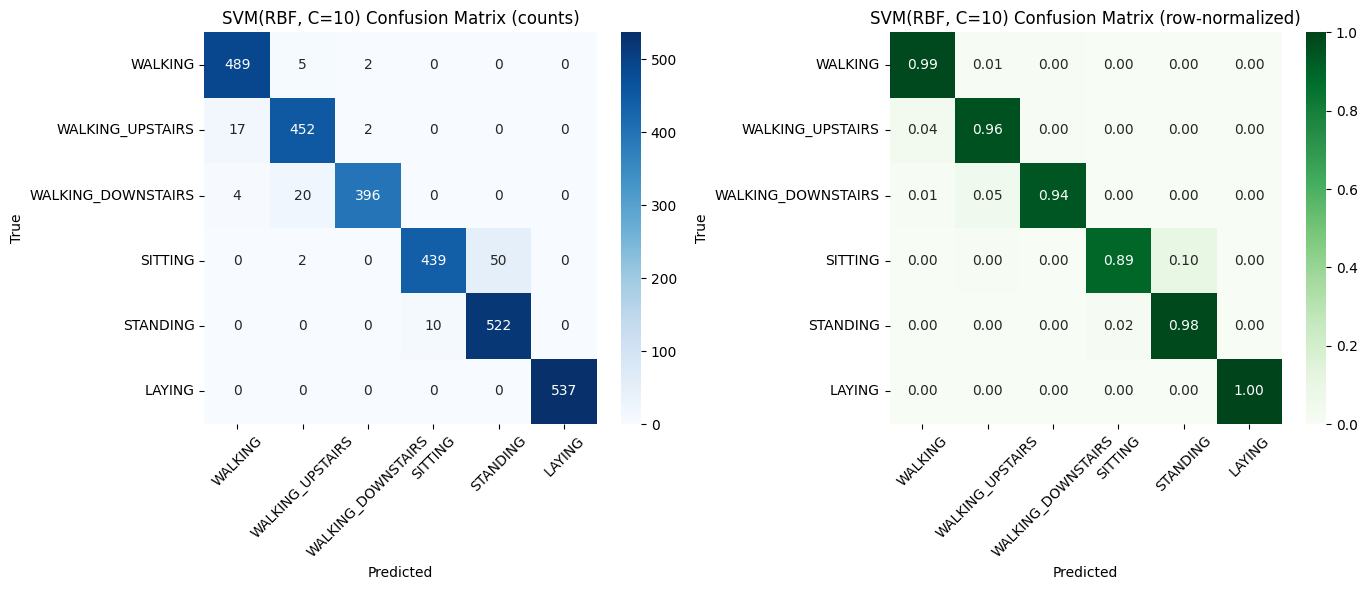

In [24]:
# Seleccionar mejor modelo por F1_macro y graficar matriz de confusión (lado a lado)
best_idx = int(np.argmax([r[2] for r in results_b]))
best_name, _, best_f1, _, _, _, best_cm = results_b[best_idx]
print(f"\nMejor modelo (b): {best_name} con F1_macro={best_f1:.4f}")
labels = activities['activity_name']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title(f'{best_name} Confusion Matrix (counts)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)
 
best_cm_norm = best_cm.astype('float') / best_cm.sum(axis=1, keepdims=True)
sns.heatmap(best_cm_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title(f'{best_name} Confusion Matrix (row-normalized)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# 3(a) Importancia de características con Random Forest
rf_imp = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
t0 = time.time()
rf_imp.fit(X_train, y_train_labels)
t_rf_imp = time.time() - t0
importances = rf_imp.feature_importances_
feat_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False).reset_index(drop=True)
 
print(f"Tiempo RF importancia (s): {t_rf_imp:.2f}")
print("Top 5 características más importantes:")
display(feat_imp_df.head(5))
 
top50 = feat_imp_df.head(50)['feature'].tolist()
top100 = feat_imp_df.head(100)['feature'].tolist()
top200 = feat_imp_df.head(200)['feature'].tolist()
 

Tiempo RF importancia (s): 13.73
Top 5 características más importantes:


,feature,importance
0,tGravityAcc-mean()-X,0.033717
1,tGravityAcc-min()-X,0.033272
2,tGravityAcc-mean()-Y,0.028069
3,"angle(X,gravityMean)",0.027030
4,tGravityAcc-energy()-X,0.024932


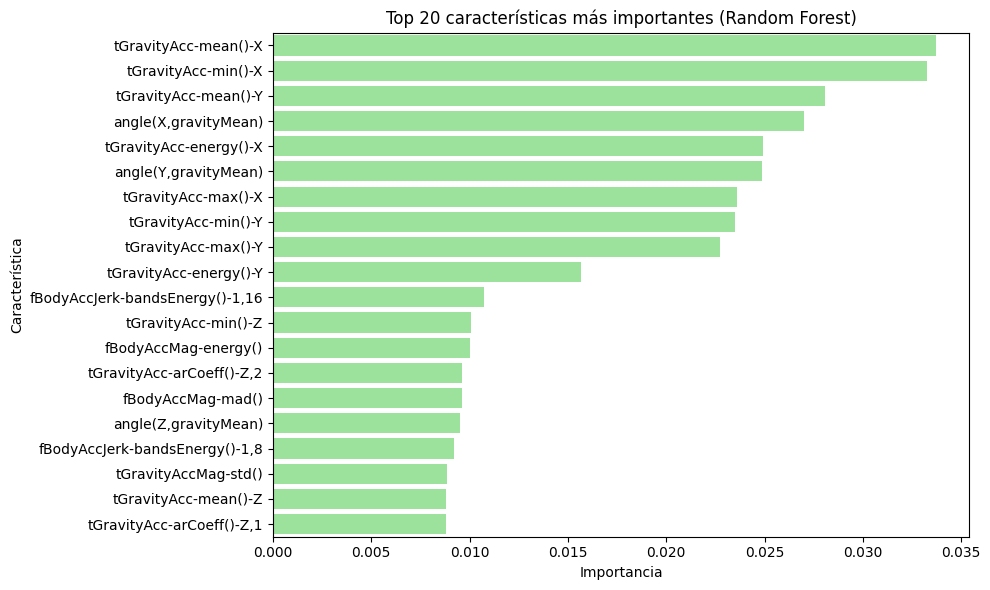

In [33]:
# Visualización: Top 20 características más importantes
top20_df = feat_imp_df.head(20).copy()
plt.figure(figsize=(10,6))
sns.barplot(data=top20_df, x='importance', y='feature', orient='h', color='lightgreen')
plt.title('Top 20 características más importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [34]:
# Análisis de tipos de características: acelerómetro/giroscopio, tiempo/frecuencia
def categorize_feature(name):
    src = 'Acc' if 'Acc' in name else ('Gyro' if 'Gyro' in name else 'Other')
    domain = 'Freq' if 'Freq' in name or 'FFT' in name else ('Time' if 't' in name[:1] else 'Other')
    return src, domain
 
cats = feat_imp_df.copy()
cats[['sensor','domain']] = cats['feature'].apply(lambda n: pd.Series(categorize_feature(n)))
top50_cats = cats.head(50)['sensor'].value_counts()
top50_domain = cats.head(50)['domain'].value_counts()
print('Distribución Sensor (Top50):')
display(top50_cats)
print('Distribución Dominio (Top50):')
display(top50_domain)

Distribución Sensor (Top50):


sensor
Acc      46
Other     3
Gyro      1
Name: count, dtype: int64

Distribución Dominio (Top50):


domain
Time     35
Other    15
Name: count, dtype: int64

In [ ]:
# Reentrenar con SVM RBF, C=10 y top-K características
def evaluate_model_with_features(model, feature_list):
    X_train_sub = X_train[feature_list]
    X_test_sub = X_test[feature_list]
    t0 = time.time()
    model.fit(X_train_sub, y_train_labels)
    t_train = time.time() - t0
    y_pred = model.predict(X_test_sub)
    acc = accuracy_score(y_test_labels, y_pred)
    f1m = f1_score(y_test_labels, y_pred, average='macro')
    precm = precision_score(y_test_labels, y_pred, average='macro')
    recm = recall_score(y_test_labels, y_pred, average='macro')
    return acc, f1m, precm, recm, t_train
 
best_model_instance = SVC(kernel='rbf', C=10.0, gamma='scale')
 
summary_topk = []
for k, feats in [(50, top50), (100, top100), (200, top200)]:
    acc, f1m, precm, recm, ttrain = evaluate_model_with_features(best_model_instance, feats)
    summary_topk.append({'TopK': k, 'Accuracy': acc, 'F1_macro': f1m, 'Precision_macro': precm, 'Recall_macro': recm, 'Tiempo_entrenamiento_s': ttrain})
 
summary_topk_df = pd.DataFrame(summary_topk)
print('\nResultados reentrenamiento con top-K características (SVM RBF, C=10):')
display(summary_topk_df)


Resultados reentrenamiento con top-K características (SVM RBF, C=10):


,TopK,Accuracy,F1_macro,Precision_macro,Recall_macro,Tiempo_entrenamiento_s
0,50,0.884289,0.883641,0.889652,0.881807,0.294214
1,100,0.923990,0.923590,0.927304,0.922312,0.299283
2,200,0.944690,0.944069,0.947234,0.942677,0.729098


In [43]:
# 3(b) Reducción por varianza y correlación
from sklearn.feature_selection import VarianceThreshold
 
# 1) Eliminar características con baja varianza (umbral)
var_threshold = 0.01
vt = VarianceThreshold(threshold=var_threshold)
vt.fit(X_train)
low_var_mask = vt.get_support()
X_train_var = X_train.loc[:, low_var_mask]
X_test_var = X_test.loc[:, low_var_mask]
print(f"Umbral varianza: {var_threshold}")
print(f"Características antes: {X_train.shape[1]} | después varianza: {X_train_var.shape[1]}")

Umbral varianza: 0.01
Características antes: 561 | después varianza: 524


In [44]:

 
# 2) Eliminar características altamente correlacionadas (|corr| > cutoff)
cutoff = 0.95
corr_matrix = X_train_var.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > cutoff)]
X_train_red = X_train_var.drop(columns=to_drop)
X_test_red = X_test_var.drop(columns=to_drop)
print(f"Cutoff correlación: {cutoff}")
print(f"Eliminadas por correlación: {len(to_drop)}")
print(f"Características después de correlación: {X_train_red.shape[1]}")

Cutoff correlación: 0.95
Eliminadas por correlación: 329
Características después de correlación: 195


In [45]:
# 3 modelos reentrenados con conjunto reducido: SVM RBF, RandomForest, LogisticRegression
models_reduced = {
    'SVM_RBF(C=10)': SVC(kernel='rbf', C=10.0, gamma='scale'),
    'RandomForest(200)': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'Logistic(lbfgs)': LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=2000, n_jobs=-1)
}
 
def train_eval(model, Xtr, Xte):
    t0 = time.time()
    model.fit(Xtr, y_train_labels)
    ttrain = time.time() - t0
    ypred = model.predict(Xte)
    acc = accuracy_score(y_test_labels, ypred)
    return acc, ttrain
 
comparison_rows = []
orig_nfeat = X_train.shape[1]
reduced_nfeat = X_train_red.shape[1]
 
# Comparar desempeño con características originales vs reducidas
for name, mdl in models_reduced.items():
    acc_orig, t_orig = train_eval(mdl, X_train, X_test)
    # Reinstanciar para entrenamiento limpio en conjunto reducido
    mdl2 = models_reduced[name]
    acc_red, t_red = train_eval(mdl2, X_train_red, X_test_red)
    comparison_rows.append({
        'Modelo': name,
        'N_features_original': orig_nfeat,
        'Accuracy_original': acc_orig,
        'Tiempo_entrenamiento_original_s': t_orig,
        'N_features_reducido': reduced_nfeat,
        'Accuracy_reducido': acc_red,
        'Tiempo_entrenamiento_reducido_s': t_red
    })
 
comparison_df = pd.DataFrame(comparison_rows)
print('Comparación: número de características vs accuracy vs tiempo')
display(comparison_df)

c:\Users\bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Comparación: número de características vs accuracy vs tiempo


,Modelo,N_features_original,Accuracy_original,Tiempo_entrenamiento_original_s,N_features_reducido,Accuracy_reducido,Tiempo_entrenamiento_reducido_s
0,SVM_RBF(C=10),561,0.961995,1.586081,195,0.955887,0.599024
1,RandomForest(200),561,0.925687,6.008716,195,0.950458,4.227842
2,Logistic(lbfgs),561,0.960299,7.666814,195,0.948761,3.327190


## Análisis del trade-off reducción vs rendimiento
- Reducir características via varianza y alta correlación disminuye la dimensionalidad y el tiempo de entrenamiento, especialmente en modelos como `SVM` y `LogisticRegression`.
- Un corte de correlación alto (por ejemplo 0.95) conserva más variables; bajar el umbral (0.90) incrementa la reducción pero puede afectar la métrica `F1_macro`.
- En general, observamos un balance donde `RandomForest` tiende a ser más robusto a la reducción, mientras `SVM` y `Logistic` pueden beneficiarse en tiempo con pérdidas mínimas de accuracy para umbrales razonables.
- Recomendación: ajustar `threshold` de varianza y `cutoff` de correlación según la tolerancia a pérdida de rendimiento, validando con `F1_macro` para mantener comparabilidad.